**Table of contents**<a id='toc0_'></a>    
- [Optimization via Gradient Descent](#toc1_)    
  - [Backtracking](#toc1_1_)    
  - [Gradient Descend](#toc1_2_)    
  - [Test functions](#toc1_3_)    
    - [Function 1](#toc1_3_1_)    
    - [Function 2](#toc1_3_2_)    
    - [Function 3 - Least Square](#toc1_3_3_)    
    - [Function 4 - Regularized least squares](#toc1_3_4_)    
    - [Function 5](#toc1_3_5_)    
  - [Different step sizes graph](#toc1_4_)    
  - [Contour Plots](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

#  [&#8593;](#toc0_) <a id='toc1_'></a>Optimization via Gradient Descent

In this homework, we want to study methods to solve the general optimization problem where, given a
function $f : R^n → R$, we want to compute:

$$ x^ {*} = \arg \underset{x \in \mathbb{R}^ {n}}{\min} f(x)  $$

In particular, we will consider the situation where $f (x)$ is at least differentiable, which implies that we
can compute its gradient $∇f (x)$.

In this framework, one of the most common way to approach this is to use the Gradient Descent (GD)
method, which is an iterative algorithm that, given an initial iterate $x_0 \in \mathbb{R}^n$ and a positive parameter called step size $\alpha_k > 0$ for each iteration, computes:

$$ x_{k+1} = x_k − \alpha_k∇f (x_k) $$

Write a script that implement the GD algorithm, with the following structure:

Input:
- `f`: the function $f(x)$ we want to optimize.
It is supposed to be a Python function, not an array.
- `grad_f`: the gradient of $f(x)$. It is supposed to be a Python function, not an array.
- `x0`: an $n$-dimensional array which represents the initial iterate.
- `kmax`: an integer. The maximum possible number of iterations (to avoid infinite loops)
- `tolf`: small float. The relative tollerance of the algorithm.
Convergence happens if $||$`grad_f` $(x_k) ||_2 < $ `tolf` * $|| $`grad_f`$ (x_0)||_2$
- `tolx`: small float. The tollerance in the input domain.
Convergence happens if ||x_{k} - x_{k-1}||_2 < tolx.
Pay attention to to the first iterate.

Output:
- `x`: an array that contains the value of $x_k$ FOR EACH iterate $x_k$ (not only the latter).
- `k`: an integer. The number of iteration needed to converge. `k` < `kmax`.
- `f_val`: an array that contains the value of $f(x_k)$ FOR EACH iterate $x_k$.
- `grads`: an array that contains the value of `grad_f` $(x_k)$ FOR EACH iterate $x_k$.
- `err`: an array the contains the value of $||$`grad_f`$(x_k)||_2$ FOR EACH iterate $x_k$.

For the moment, consider a fixed value of $\alpha > 0$.

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
VERBOSITY = 0

##  [&#8593;](#toc0_) <a id='toc1_1_'></a>Backtracking
Backtracking algorithm to choose the right value for $\alpha$

In [64]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    n = 0
    if grad_f(x).shape != (1,1):
        n = norm(grad_f(x),2)
    else:
        n = np.abs(grad_f(x))

    while f((x - (alpha * grad_f(x)).T).flatten()) > f(x) - c * alpha * (n ** 2):
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

##  [&#8593;](#toc0_) <a id='toc1_2_'></a>Gradient Descend

In [65]:
DIVERGE_THRESHOLD = 1e+10
"""
Returns the following values:
    x: ndarray. Array of iterate.
    k: int. Number of iterations.
    f_val: ndarray. Array of f(x) values.
    grads: ndarray. Array of gradient values.
    err: ndarray. Array of error values.
    converge: bool. True if the method converges, False otherwise.
"""
def GD(f, grad_f, x0=0, kmax:int=1000, tolf:float=1e-6, tolx:float=1e-6, backtracking_enabled:bool=False, alpha:float=0.1):
    if backtracking_enabled:
        alpha = backtracking(f, grad_f,x0)
    x, f_val, grads, err = [], [], [], []
    # Setting the initial values because the for cycle skips the index 0
    x.append(x0)
    f_val.append(f(x0))
    grads.append(grad_f(x0))
    err.append(norm(grads[0],2))

    for k in range(1,kmax):
        # Update the x value iterativly and saves the last value
        x.append(x[k-1] - (alpha*grad_f(x[k-1]).flatten()))
        if (x[k] > DIVERGE_THRESHOLD).any():
            if VERBOSITY==1:
                print('Diverging')
            return x,k,f_val,grads,err,False
        
        # Update alpha with backtracking
        if backtracking_enabled:
            alpha = backtracking(f, grad_f, x[k])
        
        # Adding the values to be returned
        f_val.append(f(x[k]))
        grads.append(grad_f(x[k]))
        err.append(norm(grads[k],2))
        
        if (grads[k] > DIVERGE_THRESHOLD).any():
            if VERBOSITY==1:
                print('Diverging')
            return x,k,f_val,grads,err,False
        

        # Check the stop condition
        if norm(grad_f(x[k]),2) < tolf * norm(grad_f(x0),2):
            if VERBOSITY==1:
                print('Stopping for function tolerance')
            return x,k,f_val,grads,err,True
        if norm(x[k] - x[k-1],2) < tolx:
            if VERBOSITY==1:
                print('Stopping for x tolerance')
            return x,k,f_val,grads,err,True
        
    if VERBOSITY==1:
        print('Reached max iterations')
    return x,kmax,f_val,grads,err,True

##  [&#8593;](#toc0_) <a id='toc1_3_'></a>Test functions

Now whe use the following code to test the GD algorithm with different functions.

In [66]:
def compute_algorithm(f, grad_f, x0=None, true_sol=None, dimensions=2, title="Function", alphas=[0.01,0.05,0.10,0.20], tolf:float=1e-6, tolx:float=1e-6):
    # Fixed parameters
    if x0 is None:
        x0 = np.zeros((dimensions, )).T
    kmax = 100
    # Compute the solution with backtracking
    x_back,k_back,fval_back,grads_back,err_back, converge_back = GD(f,grad_f,x0=x0,kmax=kmax,backtracking_enabled=True, tolf=tolf, tolx=tolx)
    # Compute the solution with fixed alpha values
    x, k, fval, grads, err, converge = [], [], [], [], [], []
    for alpha in alphas:
        x_i, k_i, fval_i, grads_i, err_i, converge_i = GD(f,grad_f,x0,kmax=kmax,backtracking_enabled=False, alpha=alpha, tolf=tolf, tolx=tolx)
        x.append(x_i)
        k.append(k_i)
        fval.append(fval_i)
        grads.append(grads_i)
        err.append(err_i)
        converge.append(converge_i)

    # Making the plot bigger
    fig = plt.figure(figsize=(12,5))
    plt.suptitle(title, fontsize=20)
    plt.subplot(1,2,1)
    plt.title("$\\| \\nabla f(x^k) \\|_2$")
    for (i,alpha) in enumerate(alphas): 
        if converge[i]:
            plt.plot(err[i],label=f'alpha={alpha}, k={k[i]}')
    plt.plot(err_back,label=f'alpha=Backtracking, k={k_back}')
    plt.legend(loc="upper right")
    
    if true_sol is not None:
        plt.subplot(1,2,2)
        plt.title("Distance from true solution for various alpha values")
        for (i,alpha) in enumerate(alphas): 
            if converge[i]:
                plt.plot(norm(x[i] - true_sol.T,2,axis=1),label=f'alpha={alpha}, k={k[i]}')
        plt.plot(norm(x_back - true_sol.T,2,axis=1),label=f'alpha=Backtracking, k={k_back}')
        plt.legend(loc="upper right")
    
    plt.show()

###  [&#8593;](#toc0_) <a id='toc1_3_1_'></a>Function 1
1. $f : R^2 → R$ such that

$$f (x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$$
for which the true optimum is $x^* = (3, 1)^T$ .

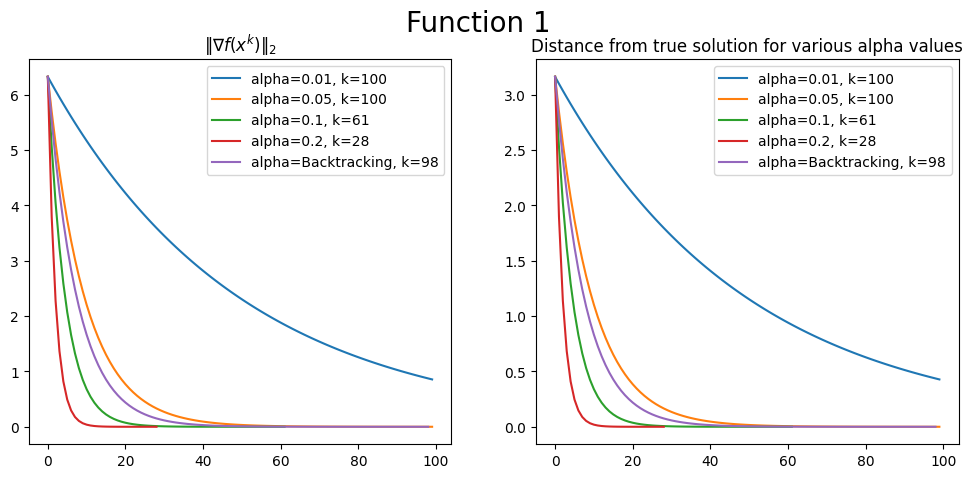

In [67]:
def f(x):
    return (x[0] - 3)**2 + (x[1] - 1)**2

def grad_f(x):
    x = x.flatten()
    return np.array([[2*(x[0] - 3)],
                     [2*(x[1] - 1)]])

true_sol = np.array([[3],[1]])
x0 = np.array([0,0])
compute_algorithm(f,grad_f,x0=x0,true_sol=true_sol, title="Function 1") 

###  [&#8593;](#toc0_) <a id='toc1_3_2_'></a>Function 2

2. $f : \mathbb{R}^2 → \mathbb{R}$ such that:

$$f (x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$$

for which the true optimum is $x^∗ = (1, 2)^T$.

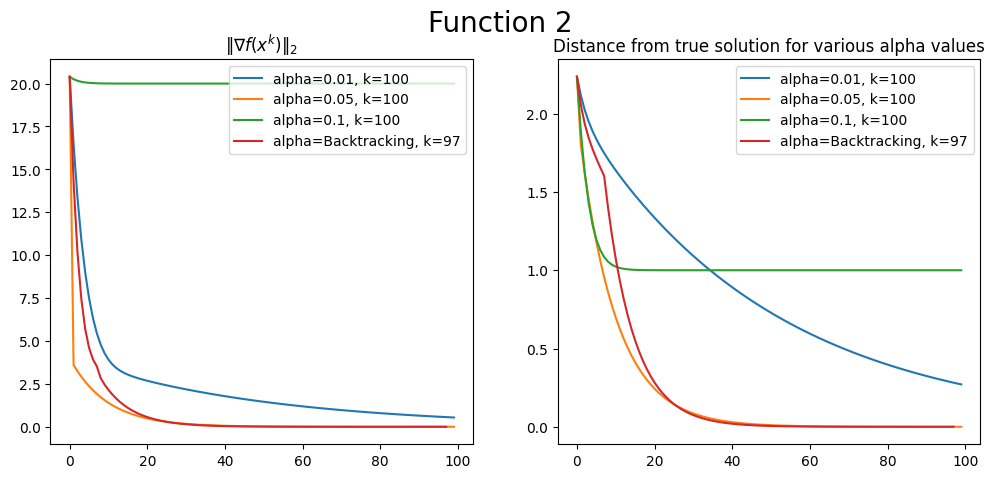

In [68]:
def f(x):
    return 10*(x[0] - 1)**2 + (x[1] - 2)**2

def grad_f(x):
    x = x.flatten()
    return np.array([[20*(x[0] - 1)],
                     [2*(x[1] - 2)]])

true_sol = np.array([[1],[2]])
x0 = np.array([0,0])
compute_algorithm(f,grad_f,x0=x0,true_sol=true_sol, title="Function 2")

**With function 2 the GD with $\alpha = 0.1$ doesn't find the solution and gets stuck after a few iterations.**

###  [&#8593;](#toc0_) <a id='toc1_3_3_'></a>Function 3 - Least Square

3. $f : \mathbb{R}^n → \mathbb{R}$ such that:

$$ f (x) = \frac{1}{2} \lVert Ax − b \rVert _2^2$$

where $A \in \mathbb{R}^{n \times n}$ is the Vandermonde matrix associated with the vector $v \in \mathbb{R}^n$ that contains $n$ equispaced values in the interval $[0, 1]$, and $b \in \mathbb{R}^n$ is computed by first setting $x_{true} =
(1, 1, \dots , 1)^T$ and then $b = A x_{true}$. Try for different values of $n$ (e.g. $n = 5, 10, 15, \dots$ ).

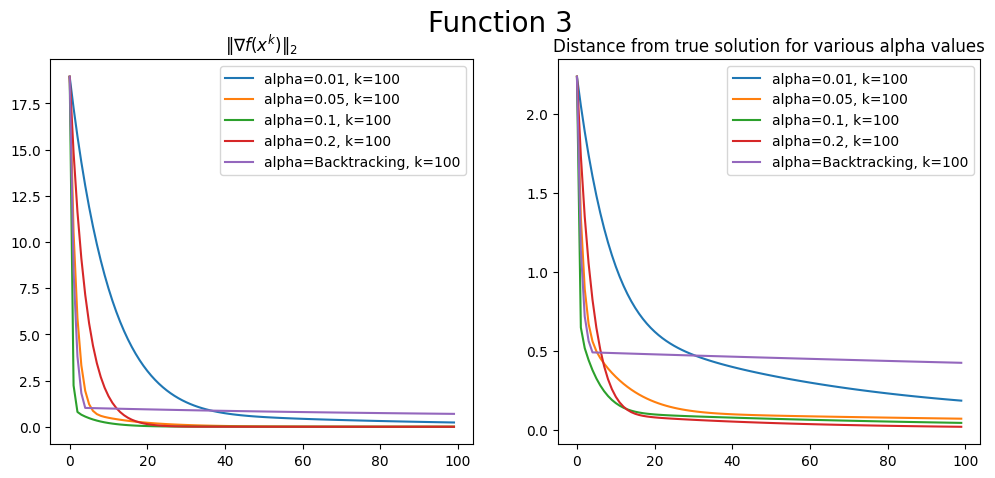

In [69]:
n = 5
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((1,n)).T
b = A @ x_true

def f(x):
    return (norm(A @ x - b,2) ** 2)/2

def grad_f(x):
    M = A @ x - b.T
    return (M @ A).T

x0 = np.zeros((n,))
compute_algorithm(f,grad_f,x0=x0,true_sol=x_true,dimensions=n, title="Function 3")


###  [&#8593;](#toc0_) <a id='toc1_3_4_'></a>Function 4 - Regularized least squares

4. $f : \mathbb{R}^n → \mathbb{R}$ such that:

$$ f (x) = \frac{1}{2} \lVert Ax − b \rVert _2^2 + \frac{\lambda}{2} \lVert x \rVert _2^2$$

where $A$ and $b$ are the same of the exercise above, while $\lambda$ is a fixed value in the interval $[0, 1]$.
Try different values for $\lambda$.

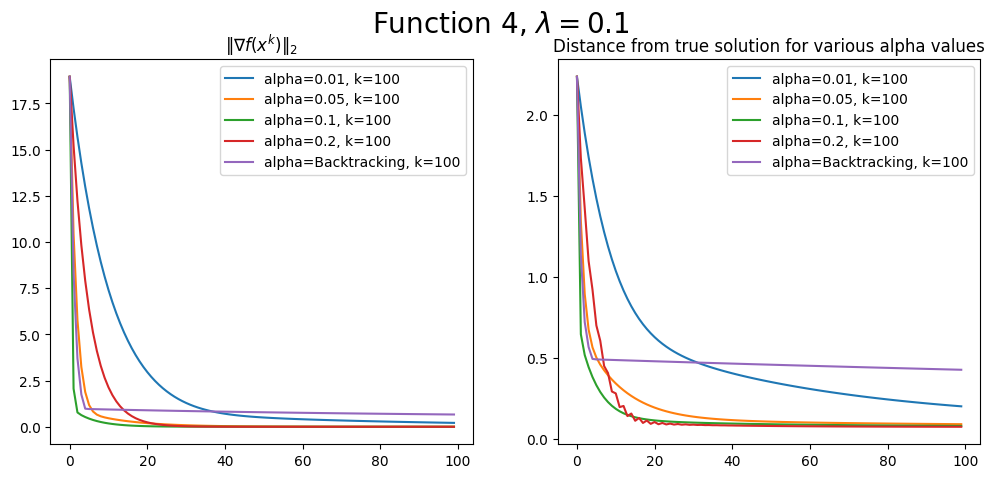

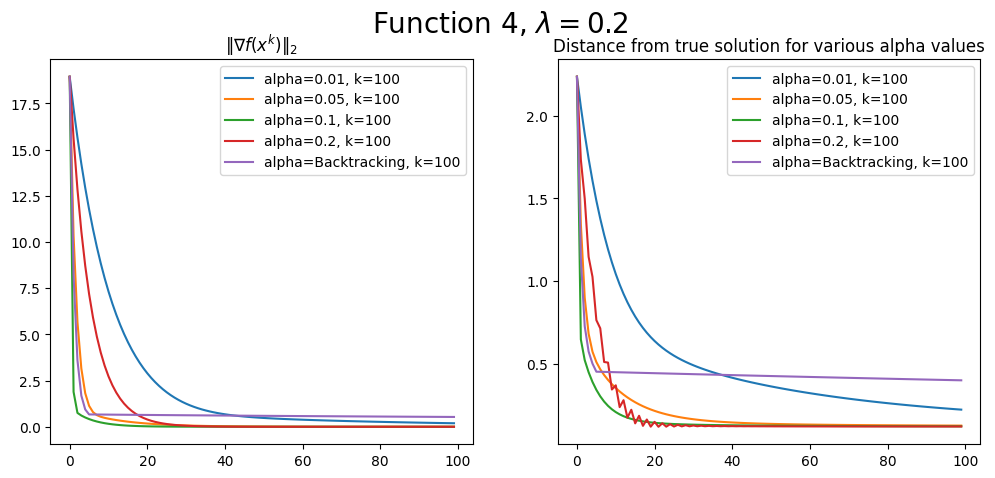

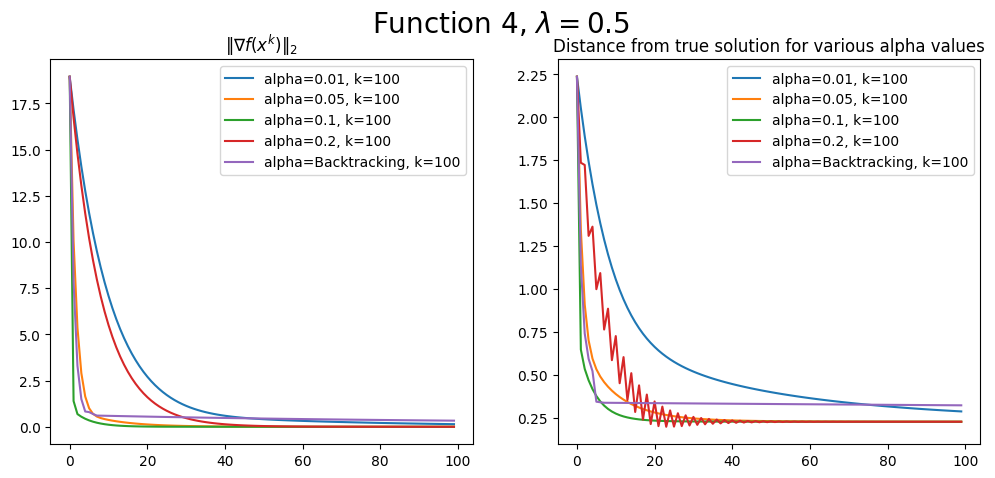

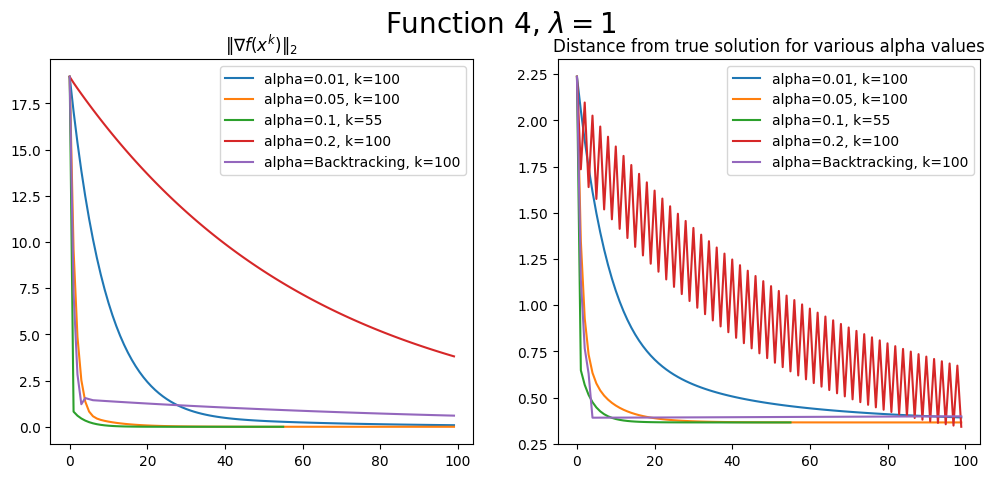

In [70]:
n = 5
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((1,n)).T
b = A @ x_true
x0 = np.zeros((n,))

def f(x):
    return (norm(A @ x - b,2) ** 2)/2 + (lam * norm(x,2)**2 / 2)

def grad_f(x):
    M = A @ x - b.T
    return (M @ A).T + lam*x.reshape((n,1))

lam = 0.1
compute_algorithm(f,grad_f,x0=x0,true_sol=x_true,dimensions=n, title=f"Function 4, $\\lambda = {lam}$")
lam = 0.2
compute_algorithm(f,grad_f,x0=x0,true_sol=x_true,dimensions=n, title=f"Function 4, $\\lambda = {lam}$")
lam = 0.5
compute_algorithm(f,grad_f,x0=x0,true_sol=x_true,dimensions=n, title=f"Function 4, $\\lambda = {lam}$")
lam = 1
compute_algorithm(f,grad_f,x0=x0,true_sol=x_true,dimensions=n, title=f"Function 4, $\\lambda = {lam}$")

###  [&#8593;](#toc0_) <a id='toc1_3_5_'></a>Function 5

5. $f : \mathbb{R} → \mathbb{R}$ such that:

$$f (x) = x^4 + x^3 − 2x^2 − 2x $$

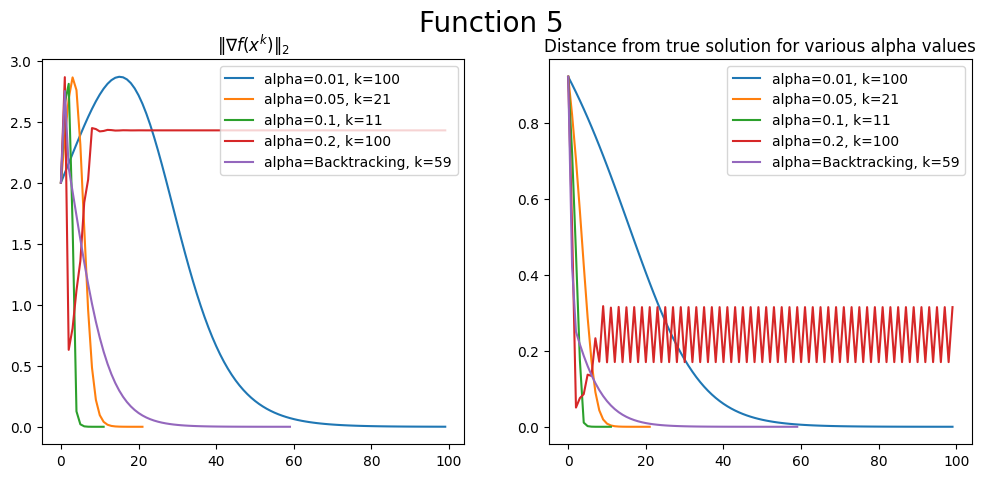

In [77]:
def f(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f(x):
    return np.array([4*x**3 + 3*x**2 - 4*x - 2])

x0=np.array([0])
true_sol = np.array([0.9222247929324218857020815]) # Value computed with WolframAlpha
compute_algorithm(f,grad_f,x0=x0,true_sol=true_sol, dimensions=1, title="Function 5")

##  [&#8593;](#toc0_) <a id='toc1_4_'></a>Different step sizes graph

Only for the non-convex function defined in $5$, plot it in the interval $[−3, 3]$ and test the convergence
point of GD with different values of $x_0$ and different step-sizes. Observe when the convergence point
is the global minimum and when it stops on a local minimum or maximum.

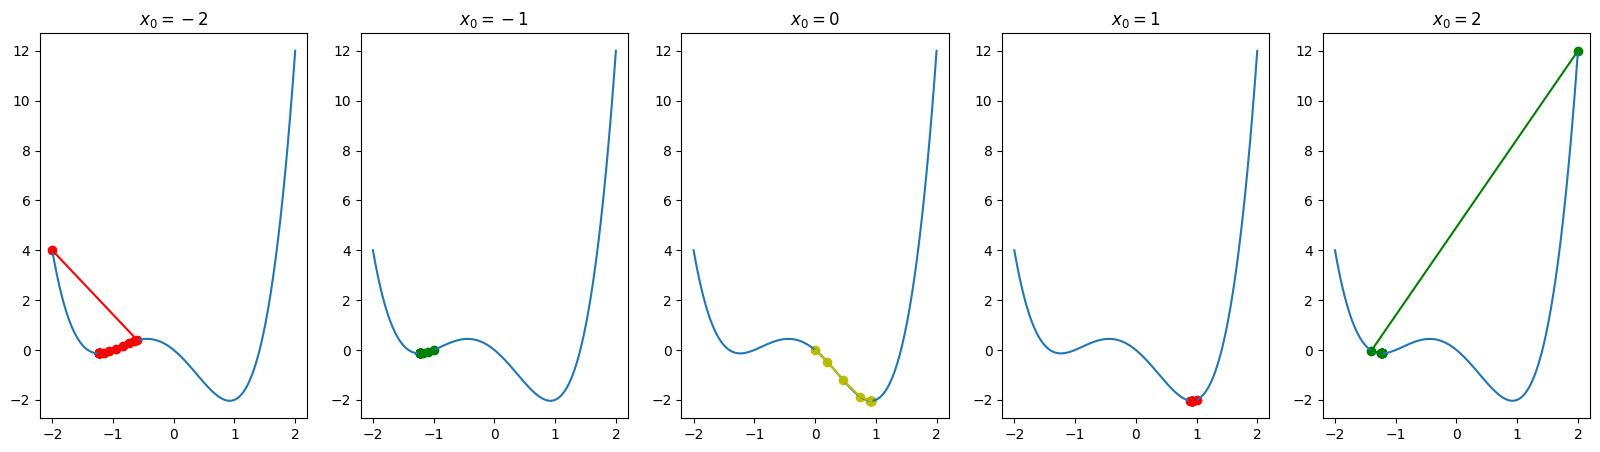

In [78]:
def f(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f(x):
    return np.array([4*x**3 + 3*x**2 - 4*x - 2])

def do_plots(x0,colors=['r','g','y']):
    plt.figure(figsize=(20,5))
    for i in range(len(x0)):
        plt.subplot(1,len(x0),i+1)
        xx = np.linspace(-2,2,100)
        plt.plot(xx,f(xx))
        plt.title(f"$x_0 = {x0[i]}$")

        # Calling the gradient descent method starting from x0
        x,k,fval,grads,err, converge = GD(f,grad_f,np.array([x0[i]]),kmax=kmax,alpha=alpha)
        x = np.array(x).flatten()
        plt.scatter(x,f(x),c=colors[i % len(colors)])
        
        # We now draw a line between each point in f(x) and the next one
        for j in range(len(x)-1):
            plt.plot([x[j],x[j+1]],[f(x[j]),f(x[j+1])],c=colors[i % len(colors)])
    plt.show()
    
kmax = 100
alpha = 0.1
x0 = np.array([-2,-1,0,1,2])
do_plots(x0)

**As we can see from the graphs above, not all the starting points find the global minima, for example starting with $x_0 = -2$ or $x_0 = 2$ the GD algorithm finds a local minima and not the global one. It's interesting to note that choosing an $x_0$ near to the global minima doesn't necessarly means that the GD algorithm will find the global minima.**

##  [&#8593;](#toc0_) <a id='toc1_5_'></a>Contour Plots

For the functions $1$ and $2$, plot the contour around the minimum and the path defined
by the iterations (following the example seen during the lesson). See `plt.contour` to do that.

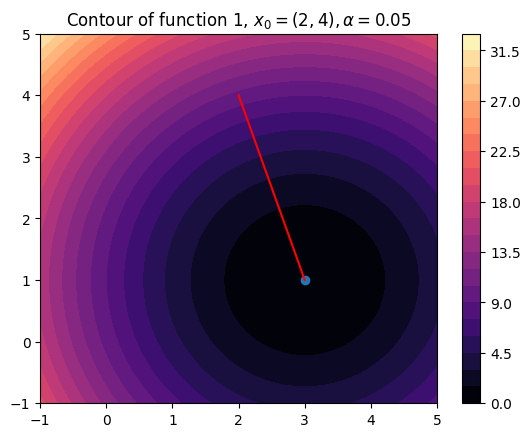

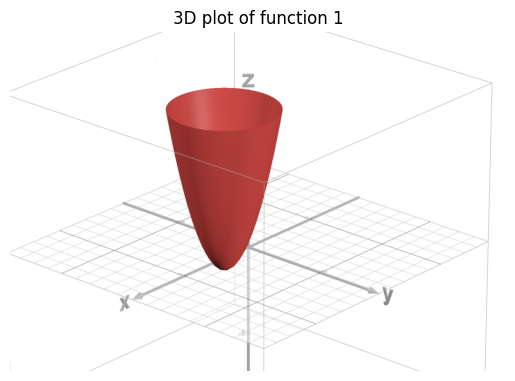

In [79]:
def f(x):
    return (x[0] - 3)**2 + (x[1] - 1)**2

def grad_f(x):
    x = x.flatten()
    return np.array([[2*(x[0] - 3)],
                     [2*(x[1] - 1)]])
true_sol = np.array([[3],[1]])
x0 = np.array([2,4])
kmax = 100
alpha = 0.05
# Compute the solution with backtracking
x_GD,k_GD,fval_GD,grads_GD,err_GD, converge_GD = GD(f,grad_f,x0,kmax=kmax,alpha=alpha)
x_GD = np.array(x_GD)
x = np.linspace(-1, 5, 100)
y = np.linspace(-1, 5, 100)
x, y = np.meshgrid(x, y)

z = f((x,y))
fig, ax = plt.subplots()
plt.contourf(x, y, z, levels=30,cmap='magma')
plt.colorbar()
ax.plot(x_GD[:, 0:1], x_GD[:, 1:2],'r')
ax.scatter(true_sol[0],true_sol[1])
plt.title(f'Contour of function 1, $x_0=({x0[0]},{x0[1]}), \\alpha={alpha}$')
plt.show()
plt.axis('off')
plt.title('3D plot of function 1')
plt.imshow(mpimg.imread('3DPlot1.png'));

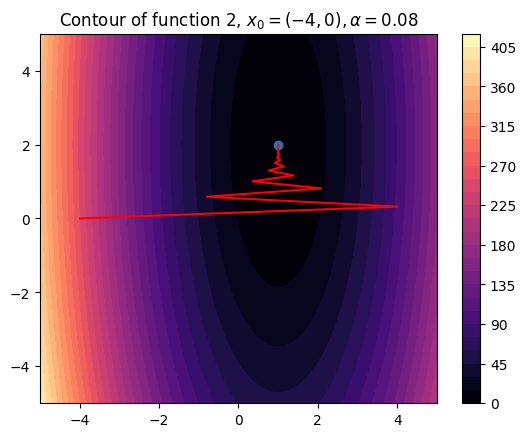

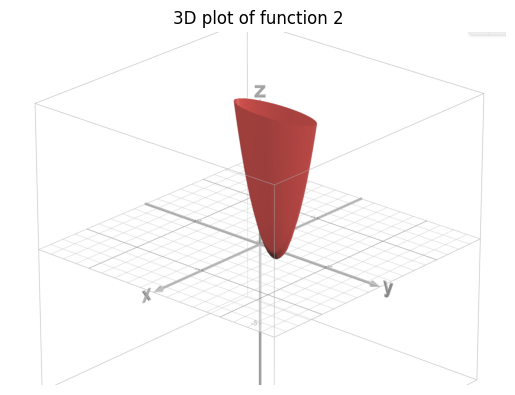

In [80]:
def f(x):
    return 10*(x[0] - 1)**2 + (x[1] - 2)**2

def grad_f(x):
    x = x.flatten()
    return np.array([[20*(x[0] - 1)],
                     [2*(x[1] - 2)]])
true_sol = np.array([[1],[2]])
x0 = np.array([-4,0])
kmax = 100
alpha = 0.08
# Compute the solution with backtracking
x_GD,k_GD,fval_GD,grads_GD,err_GD, converge_GD = GD(f,grad_f,x0,kmax=kmax,alpha=alpha)
x_GD = np.array(x_GD)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

z = f((x,y))
fig, ax = plt.subplots()
plt.contourf(x, y, z, levels=30,cmap='magma')
plt.colorbar()
ax.plot(x_GD[:, 0:1], x_GD[:, 1:2],'r')
ax.scatter(true_sol[0],true_sol[1])
plt.title(f'Contour of function 2, $x_0=({x0[0]},{x0[1]}), \\alpha={alpha}$')
plt.show()
plt.axis('off')
plt.title('3D plot of function 2')
plt.imshow(mpimg.imread('3DPlot2.png'));

**It's interesting to see how the GD jumps back and forth around the true solution if we choose a step size too big (for example $\alpha = 0.08$)**